In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
dia_df = sns.load_dataset('diamonds')

In [4]:
dia_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
dia_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
dia_df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: xlabel='carat', ylabel='depth'>

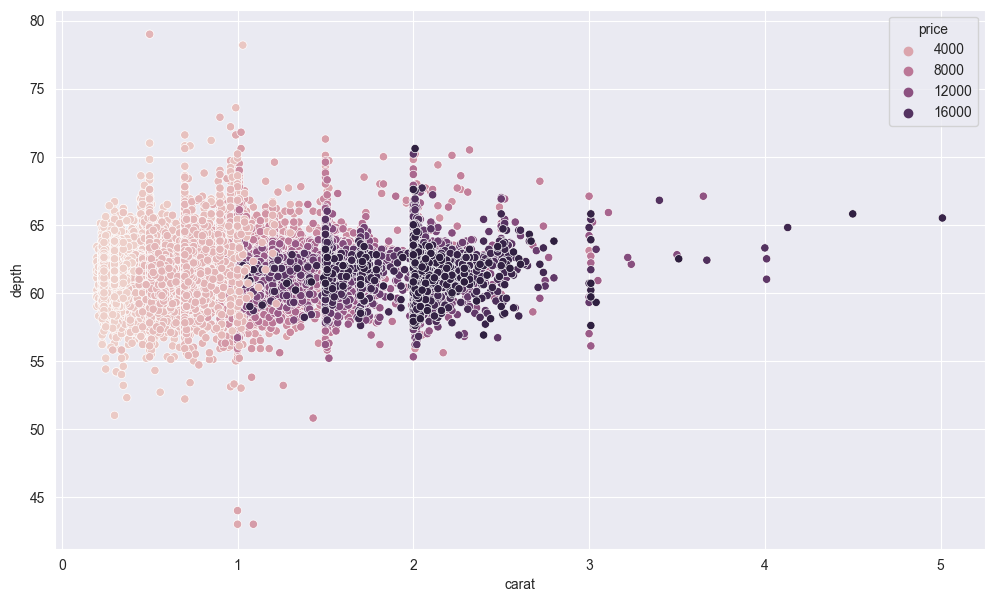

In [7]:
plt.figure(figsize = [12, 7])
sns.scatterplot(data = dia_df , x = 'carat' , y = 'depth' , hue = 'price')

In [8]:
X = dia_df.drop(['cut', 'color' , 'clarity'], axis =1 , inplace = True)   # axis =1 means to drop full column
dia_df.columns
dia_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [9]:
X = dia_df.drop('z', axis = 1)  
X.head()

,carat,depth,table,price,x,y
0,0.23,61.5,55.0,326,3.95,3.98
1,0.21,59.8,61.0,326,3.89,3.84
2,0.23,56.9,65.0,327,4.05,4.07
3,0.29,62.4,58.0,334,4.20,4.23
4,0.31,63.3,58.0,335,4.34,4.35


In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 3, random_state = 42)
model

KMeans(n_clusters=3, random_state=42)

In [12]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [13]:
model.cluster_centers_ 

array([[4.93109160e-01, 6.17361817e+01, 5.71921393e+01, 1.46267830e+03,
        4.99455079e+00, 5.00149281e+00],
       [1.71853715e+00, 6.16472627e+01, 5.78839140e+01, 1.33642410e+04,
        7.63695876e+00, 7.63854959e+00],
       [1.11763032e+00, 6.18155537e+01, 5.78726666e+01, 5.79783151e+03,
        6.62097259e+00, 6.61727713e+00]])

In [14]:
x_center = model.cluster_centers_[: , 1]
x_center

array([61.73618168, 61.64726271, 61.81555367])

In [15]:
y_center = model.cluster_centers_[: , 3]
y_center

array([ 1462.67830431, 13364.24102382,  5797.83151285])

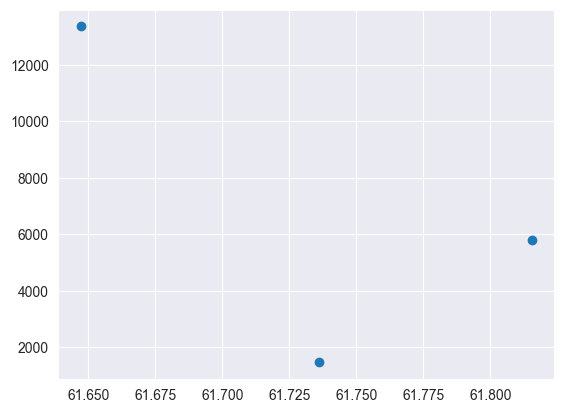

In [16]:
plt.scatter(x_center , y_center)

In [17]:
preds = model.predict(X)
preds  

array([0, 0, 0, ..., 0, 0, 0])

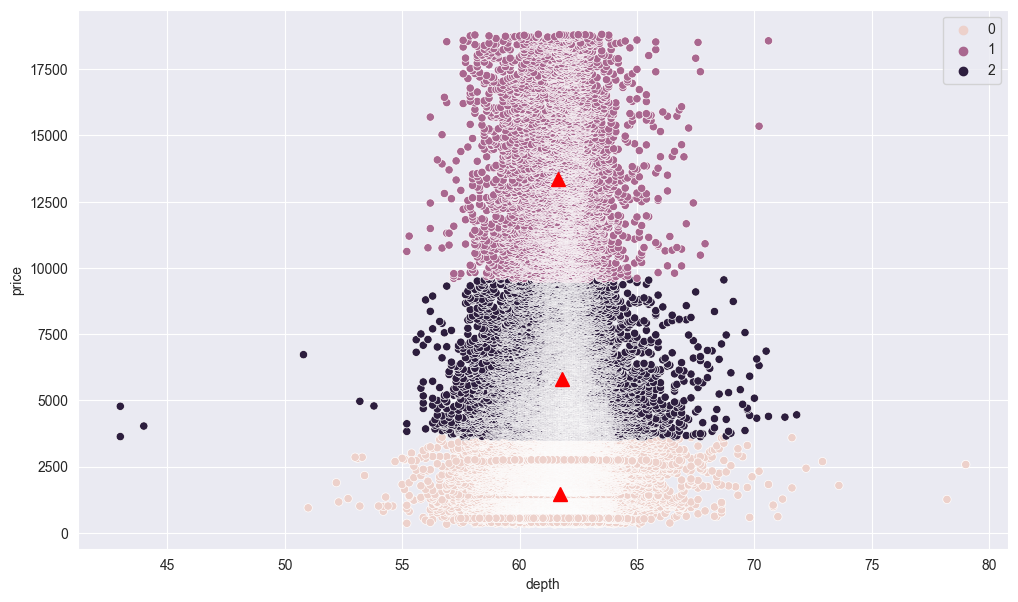

In [18]:
plt.figure(figsize= [12,7])
sns.scatterplot(data = X , x = 'depth' , y='price' , hue=preds)
plt.plot(x_center , y_center , '^r' , markersize = 10)

In [19]:
model.inertia_ 

103345774152.72662

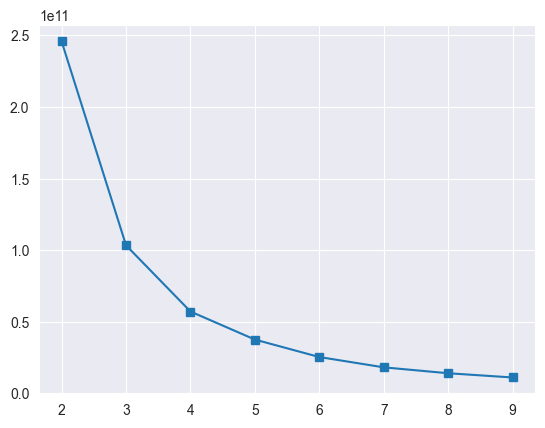

In [20]:
options = range(2,10)
inertia = []
for n in options:
    model = KMeans (n , random_state = 30) .fit(X)
    inertia.append(model.inertia_)
    
plt.plot(options , inertia , '-s')